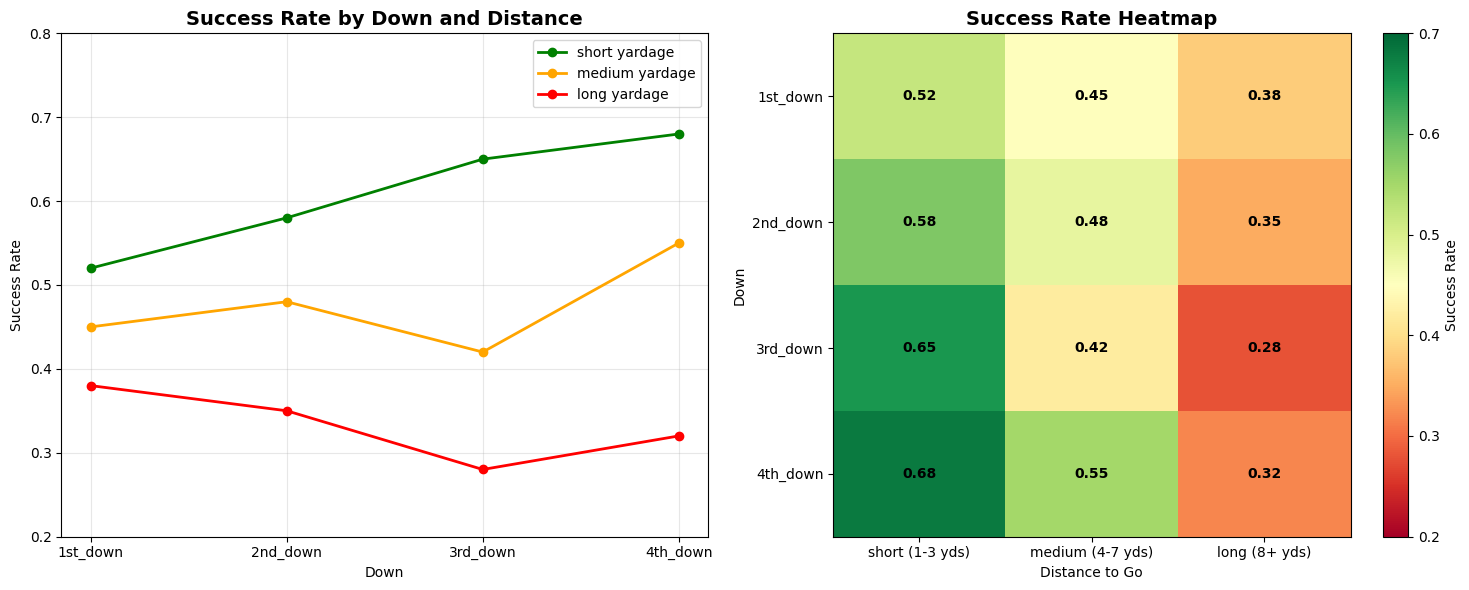

In [ ]:
# predicting using down and distance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def analyze_down_distance():
    """Analyze how down and distance affect success rate"""

    # success rates by down and distance
    down_distance_data = {
        '1st_down': {'short': 0.52, 'medium': 0.45, 'long': 0.38},
        '2nd_down': {'short': 0.58, 'medium': 0.48, 'long': 0.35},
        '3rd_down': {'short': 0.65, 'medium': 0.42, 'long': 0.28},
        '4th_down': {'short': 0.68, 'medium': 0.55, 'long': 0.32}
    }

    #visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    #graph 1: success rate by down for different distances
    distances = ['short', 'medium', 'long']
    colors = ['green', 'orange', 'red']

    for i, distance in enumerate(distances):
        success_rates = [down_distance_data[down][distance] for down in down_distance_data.keys()]
        ax1.plot(list(down_distance_data.keys()), success_rates,
                marker='o', linewidth=2, label=f'{distance} yardage', color=colors[i])

    ax1.set_title('Success Rate by Down and Distance', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Down')
    ax1.set_ylabel('Success Rate')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0.2, 0.8)

    # graph 2: heatmap of success rates
    downs = list(down_distance_data.keys())
    distance_categories = ['short (1-3 yds)', 'medium (4-7 yds)', 'long (8+ yds)']
    success_matrix = np.array([[down_distance_data[down][dist] for dist in distances] for down in downs])

    im = ax2.imshow(success_matrix, cmap='RdYlGn', aspect='auto', vmin=0.2, vmax=0.7)

    for i in range(len(downs)):
        for j in range(len(distances)):
            text = ax2.text(j, i, f'{success_matrix[i, j]:.2f}',
                           ha="center", va="center", color="black", fontweight='bold')

    ax2.set_xticks(range(len(distances)))
    ax2.set_yticks(range(len(downs)))
    ax2.set_xticklabels(distance_categories)
    ax2.set_yticklabels(downs)
    ax2.set_title('Success Rate Heatmap', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Distance to Go')
    ax2.set_ylabel('Down')

    plt.colorbar(im, ax=ax2, label='Success Rate')
    plt.tight_layout()
    plt.show()

    return down_distance_data

down_distance_results = analyze_down_distance()

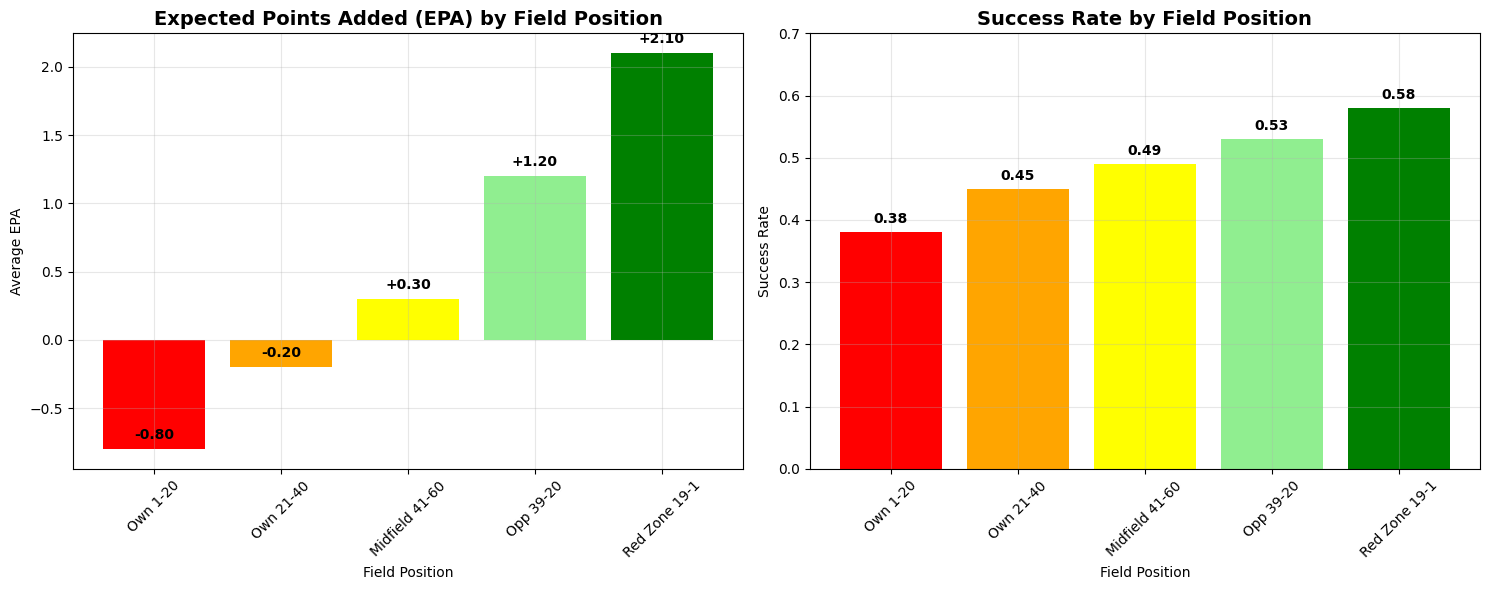

FIELD POSITION INSIGHTS:
Own 1-20: EPA = -0.80, Success Rate = 0.38
Own 21-40: EPA = -0.20, Success Rate = 0.45
Midfield 41-60: EPA = +0.30, Success Rate = 0.49
Opp 39-20: EPA = +1.20, Success Rate = 0.53
Red Zone 19-1: EPA = +2.10, Success Rate = 0.58


In [ ]:
# predicting using feild position
def analyze_field_position():
    """Analyze how field position affects EPA and success rate"""

    #EPA and success rate by field position zones
    field_zones = ['Own 1-20', 'Own 21-40', 'Midfield 41-60', 'Opp 39-20', 'Red Zone 19-1']

    epa_by_zone = [-0.8, -0.2, 0.3, 1.2, 2.1]
    success_by_zone = [0.38, 0.45, 0.49, 0.53, 0.58]

    #visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # graph 1: EPA by field position
    bars1 = ax1.bar(field_zones, epa_by_zone, color=['red', 'orange', 'yellow', 'lightgreen', 'green'])
    ax1.set_title('Expected Points Added (EPA) by Field Position', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Field Position')
    ax1.set_ylabel('Average EPA')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)

    for bar, value in zip(bars1, epa_by_zone):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                f'{value:+.2f}', ha='center', va='bottom', fontweight='bold')

    # graph 2: success by field position
    bars2 = ax2.bar(field_zones, success_by_zone, color=['red', 'orange', 'yellow', 'lightgreen', 'green'])
    ax2.set_title('Success Rate by Field Position', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Field Position')
    ax2.set_ylabel('Success Rate')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 0.7)

    for bar, value in zip(bars2, success_by_zone):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # insights
    print("FIELD POSITION INSIGHTS:")

    for i, zone in enumerate(field_zones):
        print(f"{zone}: EPA = {epa_by_zone[i]:+.2f}, Success Rate = {success_by_zone[i]:.2f}")

    return {
        'field_zones': field_zones,
        'epa': epa_by_zone,
        'success_rate': success_by_zone
    }

field_position_results = analyze_field_position()

In [ ]:
#combined
def predict_with_factors(down, distance, field_position):
    """
    Predict success probability using both down/distance and field position factors
    """
    # success rates from our analysis
    down_distance_weights = {
        1: {'short': 0.52, 'medium': 0.45, 'long': 0.38},
        2: {'short': 0.58, 'medium': 0.48, 'long': 0.35},
        3: {'short': 0.65, 'medium': 0.42, 'long': 0.28},
        4: {'short': 0.68, 'medium': 0.55, 'long': 0.32}
    }

    field_position_weights = {
        'own_1_20': 0.38,
        'own_21_40': 0.45,
        'midfield': 0.49,
        'opp_39_20': 0.53,
        'red_zone': 0.58
    }

    # categorizing distance
    if distance <= 3:
        dist_category = 'short'
    elif distance <= 7:
        dist_category = 'medium'
    else:
        dist_category = 'long'

    # categorizing feild position
    if field_position <= 20:
        field_category = 'own_1_20'
    elif field_position <= 40:
        field_category = 'own_21_40'
    elif field_position <= 60:
        field_category = 'midfield'
    elif field_position <= 80:
        field_category = 'opp_39_20'
    else:
        field_category = 'red_zone'

    down_dist_prob = down_distance_weights[down][dist_category]
    field_pos_prob = field_position_weights[field_category]

    combined_prob = (down_dist_prob + field_pos_prob) / 2

    #prediction
    if combined_prob > 0.55:
        recommendation = "HIGH SUCCESS - Good situation"
    elif combined_prob > 0.45:
        recommendation = "MODERATE SUCCESS - Average play"
    else:
        recommendation = "LOW SUCCESS - Risky situation"

    return {
        'down_distance_prob': down_dist_prob,
        'field_position_prob': field_pos_prob,
        'combined_probability': combined_prob,
        'recommendation': recommendation
    }

test_cases = [
    (2, 5, 45),   # 2nd and 5 at midfield
    (3, 12, 15),  # 3rd and long in own territory
    (1, 10, 85),  # 1st and 10 in red zone
]

print("COMBINED PREDICTION:")

for down, distance, field_pos in test_cases:
    result = predict_with_factors(down, distance, field_pos)
    print(f"\nDown: {down}, Distance: {distance}, Field Position: {field_pos}")
    print(f"Down/Distance Probability: {result['down_distance_prob']:.3f}")
    print(f"Field Position Probability: {result['field_position_prob']:.3f}")
    print(f"Combined Probability: {result['combined_probability']:.3f}")
    print(f"Recommendation: {result['recommendation']}")

COMBINED PREDICTION:

Down: 2, Distance: 5, Field Position: 45
Down/Distance Probability: 0.480
Field Position Probability: 0.490
Combined Probability: 0.485
Recommendation: MODERATE SUCCESS - Average play

Down: 3, Distance: 12, Field Position: 15
Down/Distance Probability: 0.280
Field Position Probability: 0.380
Combined Probability: 0.330
Recommendation: LOW SUCCESS - Risky situation

Down: 1, Distance: 10, Field Position: 85
Down/Distance Probability: 0.380
Field Position Probability: 0.580
Combined Probability: 0.480
Recommendation: MODERATE SUCCESS - Average play
